<a href="https://colab.research.google.com/github/ch-ayesha/Autism-Prediction-Analysis/blob/main/Autism_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/Autism-Prediction.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice austim  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [4]:
df.shape


(200, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
A1_Score,200.0,0.575000,0.495584,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,200.0,0.555000,0.498213,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,200.0,0.475000,0.500628,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,200.0,0.425000,0.495584,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,200.0,0.450000,0.498742,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,200.0,0.340000,0.474898,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,200.0,0.420000,0.494797,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,200.0,0.545000,0.499220,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,200.0,0.540000,0.499648,0.000000,0.000000,1.000000,1.000000,1.000000


In [7]:
df['ethnicity'].value_counts()


,count
ethnicity,
White-European,66
?,54
Middle Eastern,27
Asian,17
South Asian,9
Pasifika,8
Others,7
Latino,4
Turkish,3


In [8]:
df['relation'].value_counts()


,count
relation,
Self,180
Parent,8
?,6
Relative,2
Others,2
Health care professional,2


In [9]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


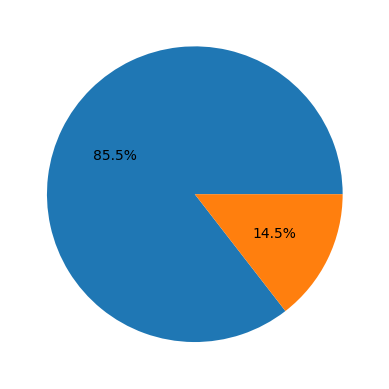

In [14]:
plt.pie(df['austim'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [16]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)


In [17]:
ints.remove('ID')
ints.remove('austim')


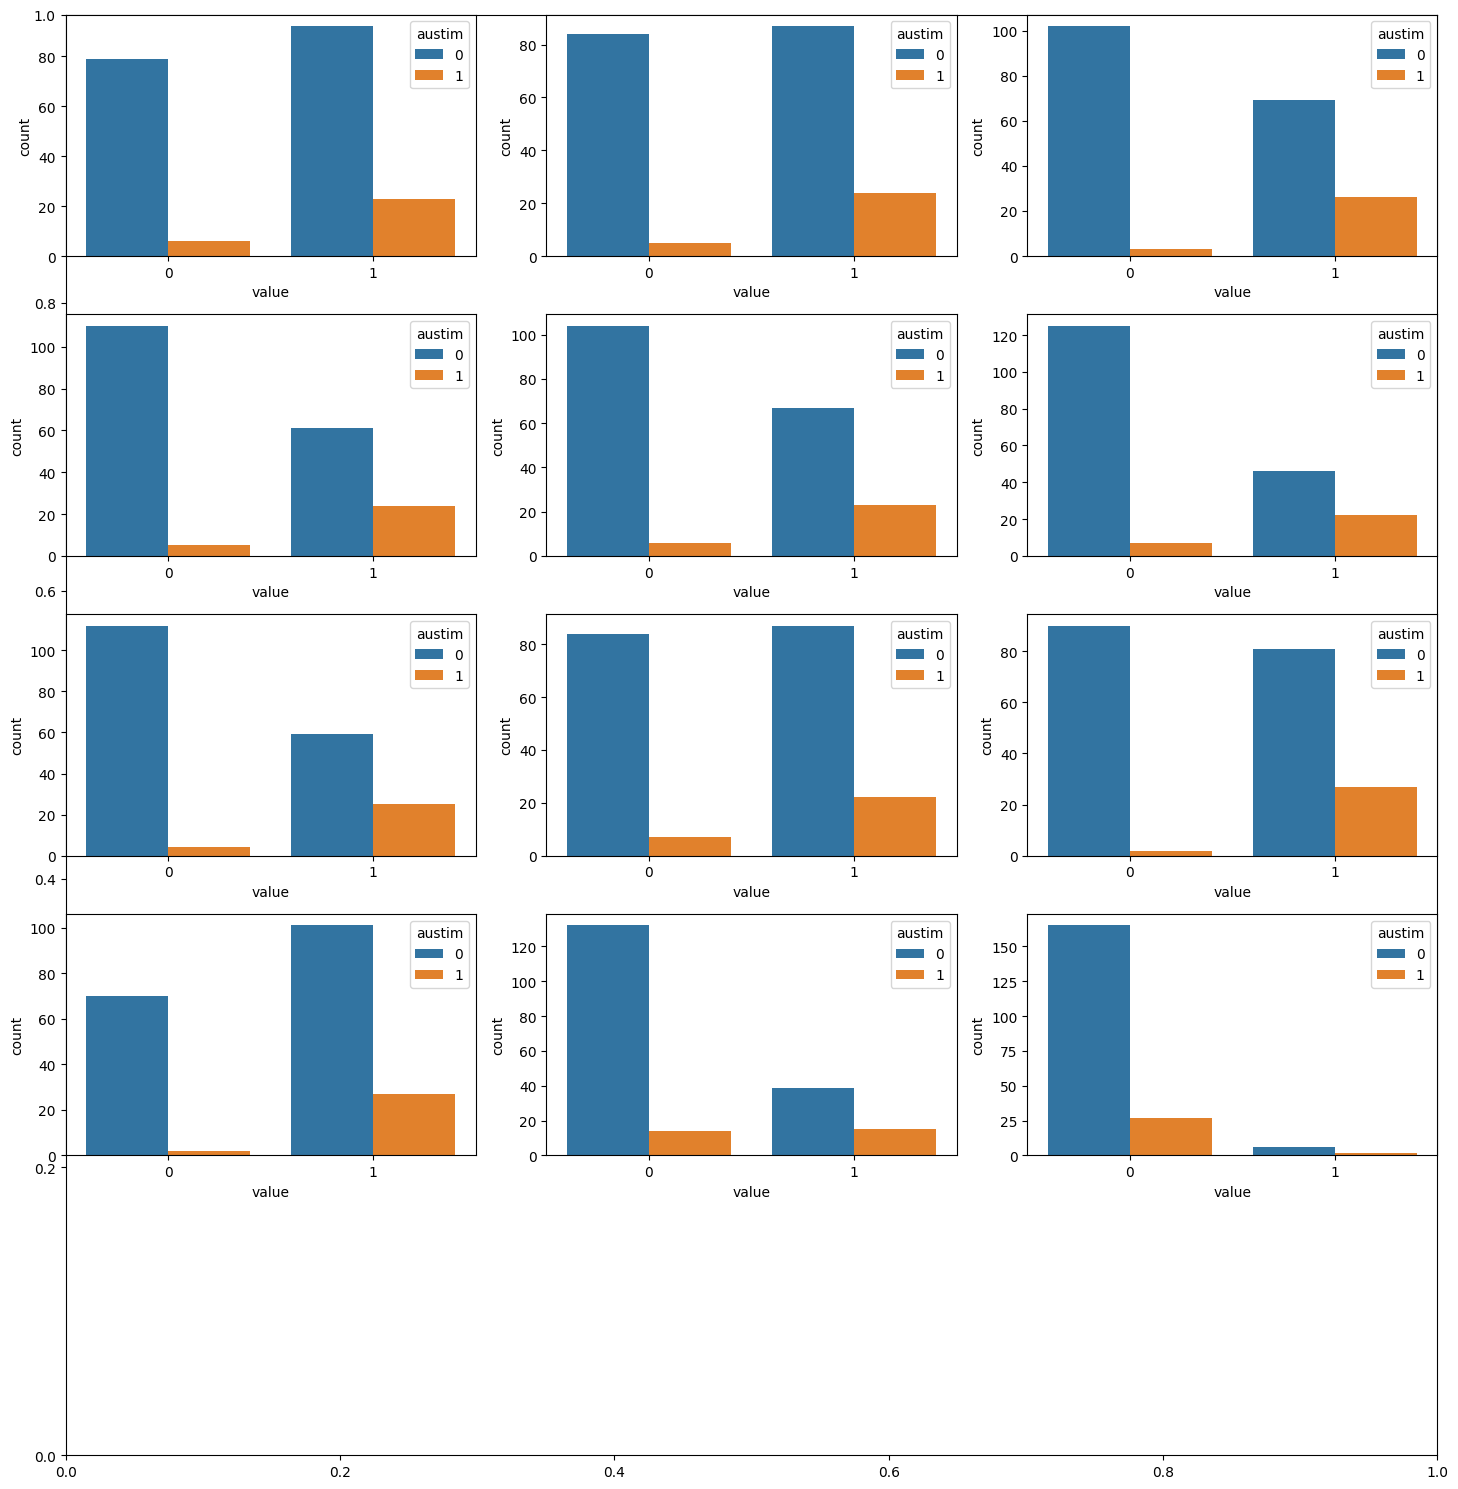

In [18]:
# Convert the data to long-form using melt
df_melted = df.melt(id_vars=['ID', 'austim'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  # Use the melted DataFrame and specify x and hue
  sb.countplot(x='value', hue='austim', data=df_melted[df_melted['col'] == col])

plt.tight_layout()
plt.show()

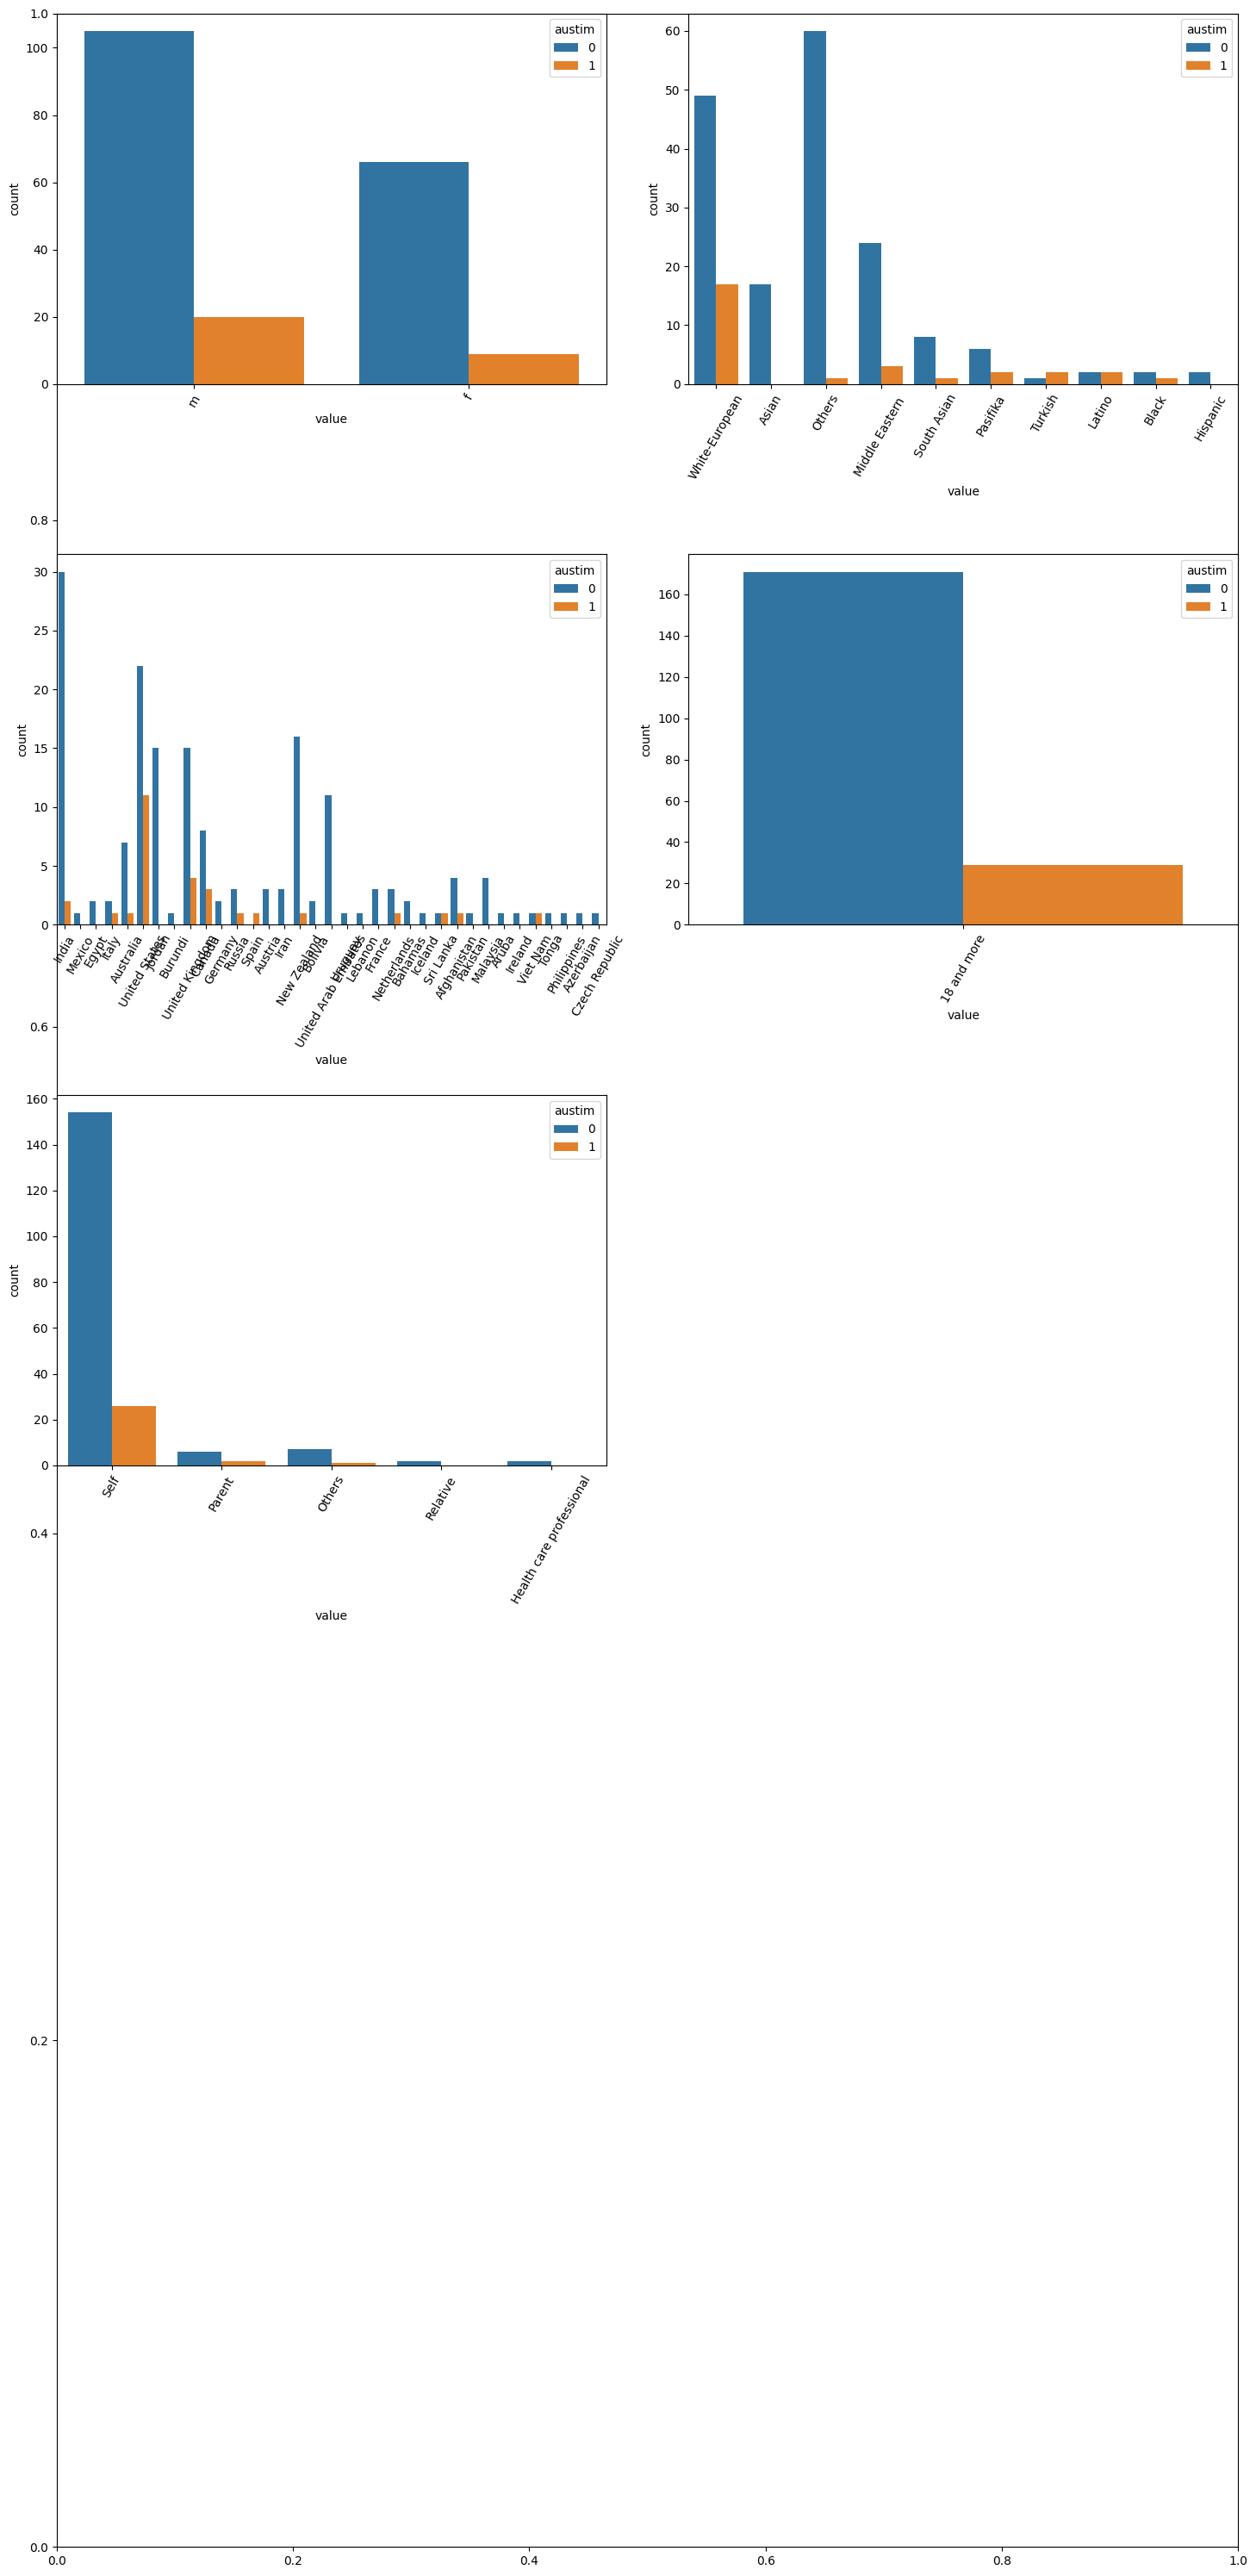

In [22]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 2, i+1)
    # Convert the data to long-form for the specific column
    df_melted = df.melt(id_vars=['austim'], value_vars=[col], var_name='col', value_name='value')

    # Use the melted DataFrame and specify x and hue
    sb.countplot(x='value', hue='austim', data=df_melted)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

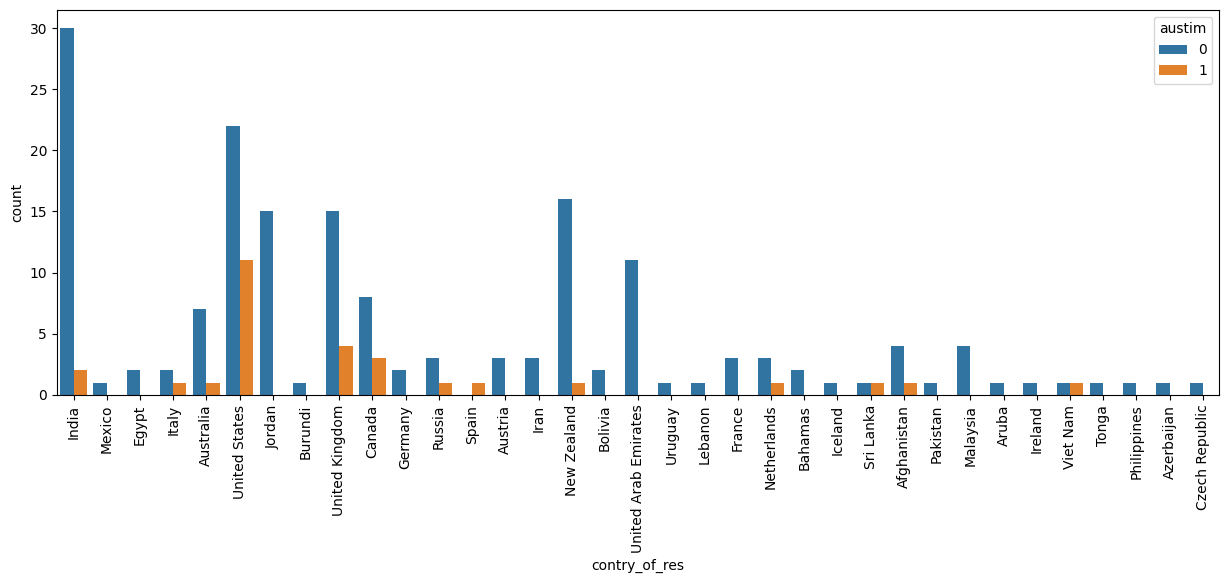

In [23]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='austim')
plt.xticks(rotation=90)
plt.show()


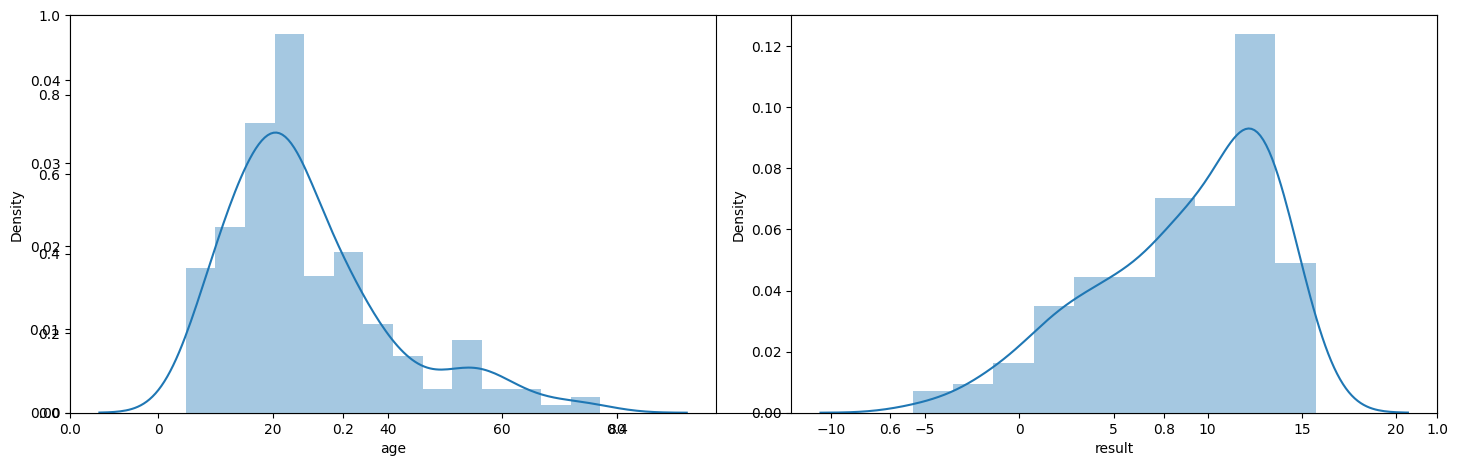

In [24]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


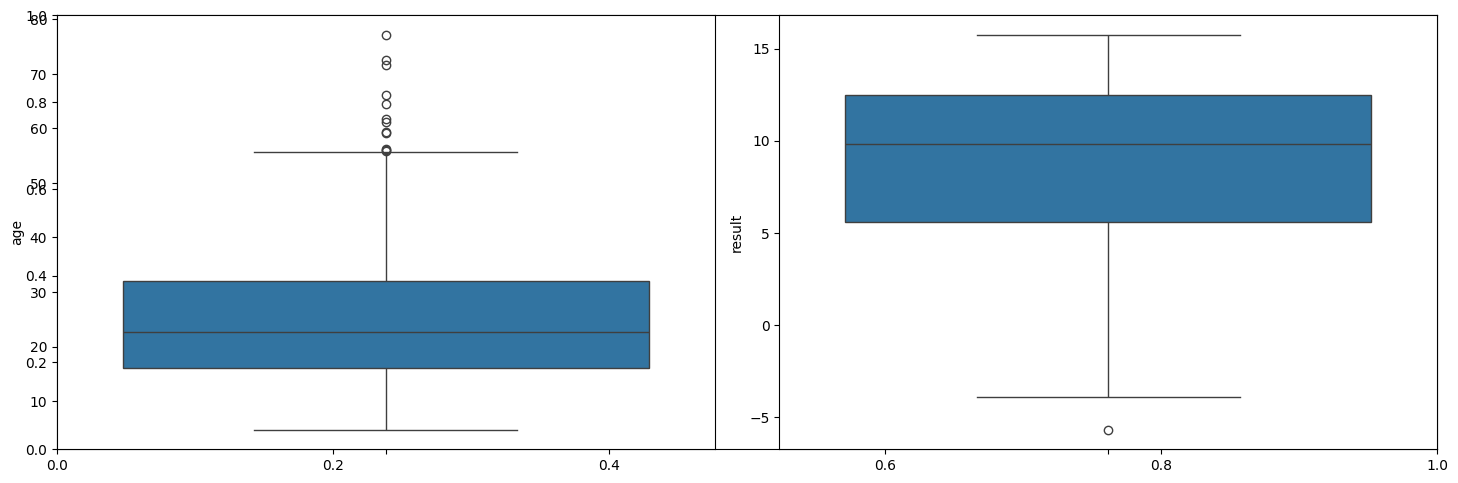

In [25]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [26]:
df = df[df['result']>-5]
df.shape


(199, 21)

In [27]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


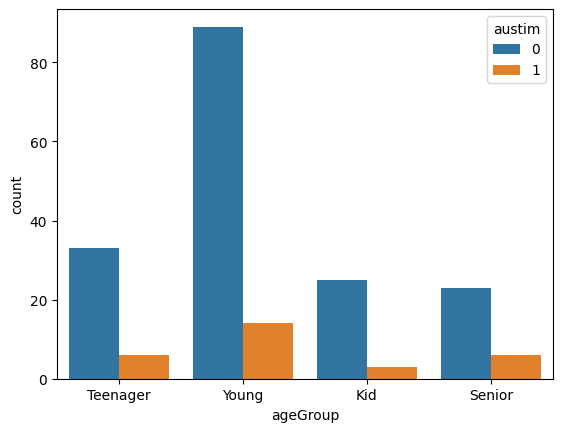

In [28]:
sb.countplot(x=df['ageGroup'], hue=df['austim'])
plt.show()


In [29]:
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


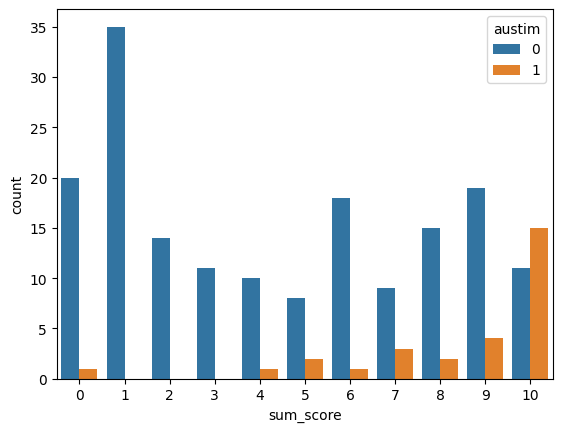

In [30]:
sb.countplot(x=df['sum_score'], hue=df['austim'])
plt.show()


In [31]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


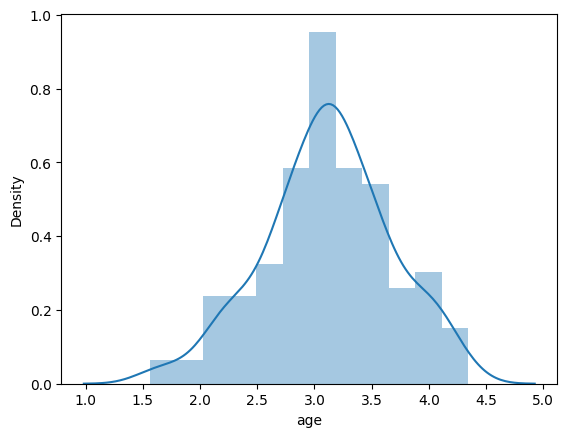

In [32]:
sb.distplot(df['age'])
plt.show()


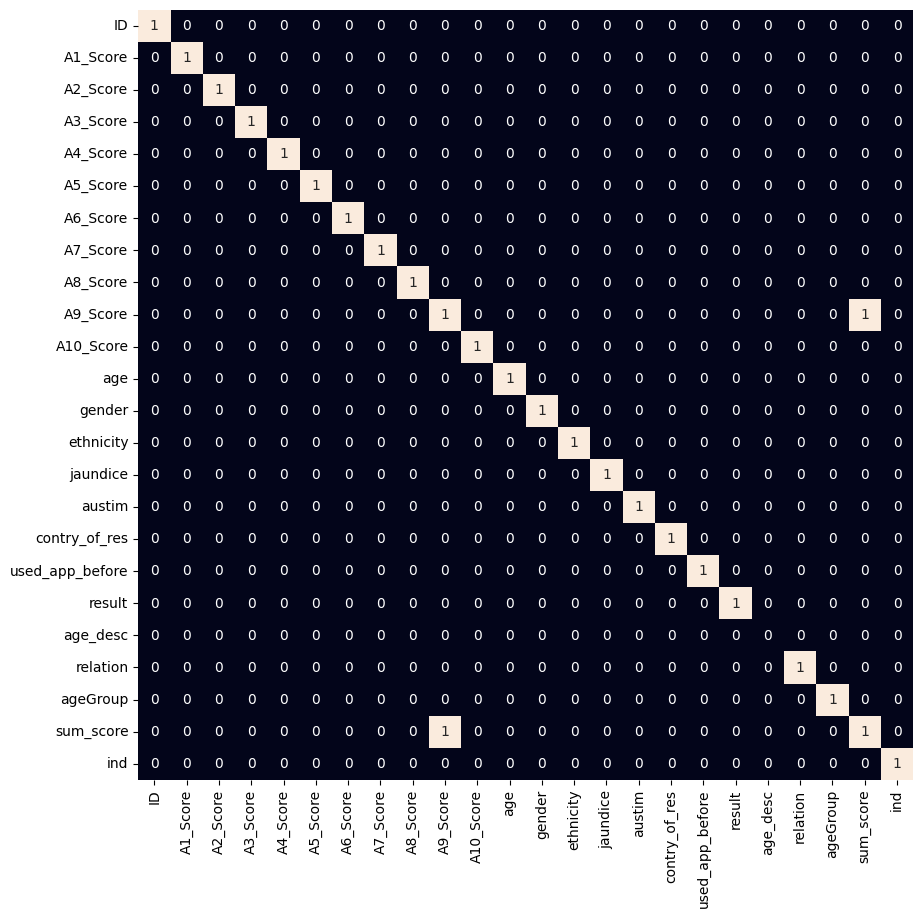

In [33]:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [35]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['austim'], axis=1)
target = df['austim']


In [36]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((274, 20), (274,))

In [37]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [38]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  0.9781021897810219
Validation Accuracy :  1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9285714285714286

SVC() : 
Training Accuracy :  1.0
Validation Accuracy :  0.8571428571428572



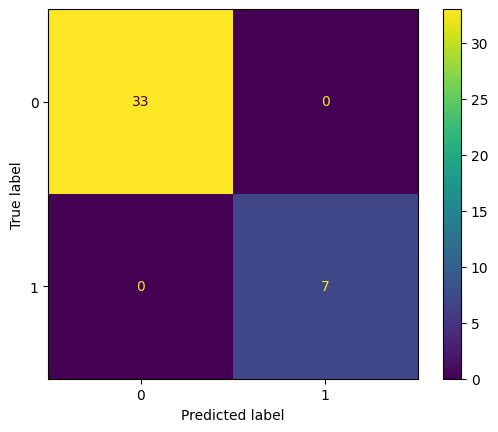

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()